# Chromatic Aberration Optimization

In [1]:
import numpy as np
from optiland import optic, optimization

Define a starting lens:

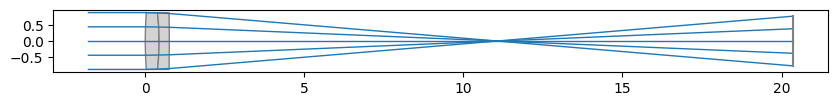

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=1, radius=12.38401, thickness=0.4340, is_stop=True, material='N-SF11')
lens.add_surface(index=2, radius=-7.94140, thickness=0.3210, material='N-SF2')
lens.add_surface(index=3, radius=-48.44396, thickness=19.6059)
lens.add_surface(index=4)

# add aperture
lens.set_aperture(aperture_type='imageFNO', value=6)

# add field
lens.set_field_type(field_type='angle')
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.48613270)
lens.add_wavelength(value=0.58756180, is_primary=True)
lens.add_wavelength(value=0.65627250)


# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [4]:
"""
Add target for minimal chromatic aberration
"""

input_data = {'optic': lens}

# add chromatic aberration operand - sum of longitudinal chromatic aberration
problem.add_operand(operand_type='LchC_sum', target=0, weight=1, input_data=input_data)

In [5]:
"""
Add target for minimal rms spot size.
"""

input_data = {'optic': lens, 'surface_number': -1, 'Hx': 0, 'Hy': 0,
              'num_rays': 5, 'wavelength': 0.55, 'distribution': 'hexapolar'}

# add RMS spot size operand
problem.add_operand(operand_type='rms_spot_size', target=0, weight=1, input_data=input_data)

Define variables - let the index of refraction vary for both materials in the doublet:

In [6]:
problem.add_variable(lens, 'index', surface_number=1, wavelength=0.55)
problem.add_variable(lens, 'index', surface_number=2, wavelength=0.55)

Check initial merit function value and system properties:

In [7]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |               0.612239 |                 0 |
+----+------------------------+-------------------+
+----+----------------+----------+----------+-----------+-----------+--------------------+
|    | Operand Type   |   Target |   Weight |     Value |     Delta |   Contribution (%) |
|----+----------------+----------+----------+-----------+-----------+--------------------|
|  0 | LchC sum       |        0 |        1 | -0.487703 | -0.487703 |            38.8499 |
|  1 | rms spot size  |        0 |        1 |  0.611869 |  0.611869 |            61.1501 |
+----+----------------+----------+----------+-----------+-----------+--------------------+
+----+-----------------+-----------+---------+--------------+--------------+
|    | Variable Type   |   Surface |   Value | Min. Bound   | Max. Bound   |
|----+-----------------+-----------+----

Define optimizer:

In [8]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [9]:
optimizer.optimize()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 3.7859263515197297e-06
        x: [ 1.202e-01  2.402e-01]
      nit: 3
      jac: [-9.206e-03  4.815e-03]
     nfev: 39
     njev: 13
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [10]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |            3.78597e-06 |           99.9994 |
+----+------------------------+-------------------+
+----+----------------+----------+----------+------------+------------+--------------------+
|    | Operand Type   |   Target |   Weight |      Value |      Delta |   Contribution (%) |
|----+----------------+----------+----------+------------+------------+--------------------|
|  0 | LchC sum       |        0 |        1 | 0          | 0          |                  0 |
|  1 | rms spot size  |        0 |        1 | 0.00194576 | 0.00194576 |                100 |
+----+----------------+----------+----------+------------+------------+--------------------+
+----+-----------------+-----------+---------+--------------+--------------+
|    | Variable Type   |   Surface |   Value | Min. Bound   | Max. Bound   |
|----+-----------------+----

Draw final lens:

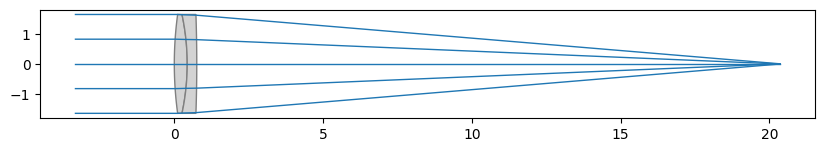

In [11]:
lens.draw(num_rays=5)